Задача следующая: <br>
В x_train и y_train находится датасет из 3000 примеров. Каждый пример в x_train это набор физических измерений морского ушка(!), по этим измерениям нужно научиться предсказывать возраст этого организма, который указан в y_train. <br>
x_train и y_train надо использовать чтобы обучить разные модели и валидировать их. Напоминаю прилизительный арсенал того что нужно использовать\попробовать:
- Выбор модели (LinearRegression, Ridge, Lasso, ElasticNet)
- Настройка регуляризации alpha
- Дизайн признаков - добавить степени, призведения или что-нибудь еще

Потом с помощью самой лучшей модели надо построить предсказания для x_test, сохранить их в файл и отправить мне на почту, с названием файла  surname_test_prediction.npy . <br>
У меня есть ответ для этих данных, я посчитаю R-score и на занятии обсудим лучшие решения.

Ниже пример для дефолтной линейной регрессии.

In [7]:
import numpy as np

In [8]:
x_train = np.load('./data/x_train.npy')
y_train = np.load('./data/y_train.npy')

x_test = np.load('./data/x_test.npy')

## Исследуем датасет

In [24]:
x_train.mean(axis=0)

array([0.36733333, 0.521545  , 0.4061    , 0.13926167, 0.82266233,
       0.35737417, 0.17902883, 0.2370235 ])

In [25]:
x_train.std(axis=0)

array([0.48207837, 0.12107988, 0.10021854, 0.04334797, 0.49367103,
       0.22444641, 0.10990688, 0.14068105])

In [26]:
import matplotlib.pyplot as plt

In [59]:
mask = x_train[:, 3] < 0.4

In [61]:
x_train[mask, 3].shape

(2998,)

In [65]:
x_train = x_train[mask]
y_train = y_train[mask]

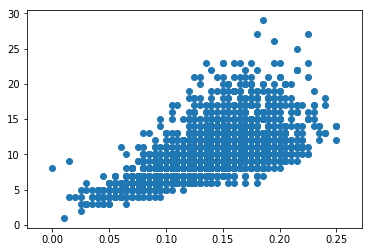

In [64]:
plt.scatter(x_train[mask,3], y_train[mask])

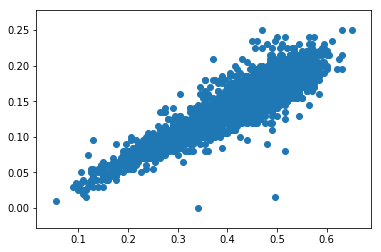

In [70]:
plt.scatter(x_train[:,2], x_train[:,3])

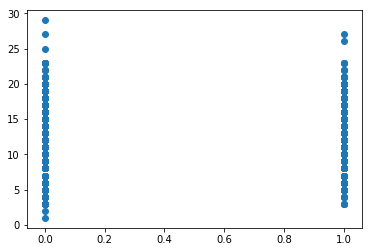

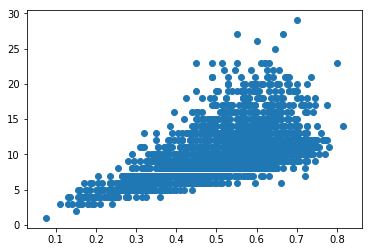

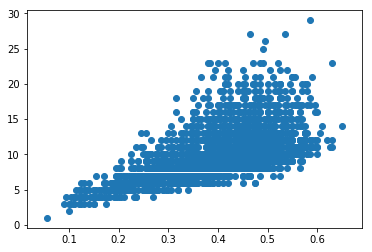

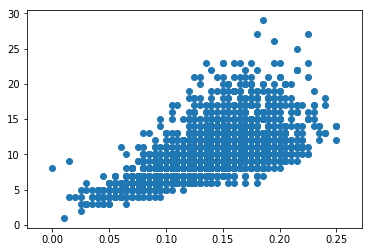

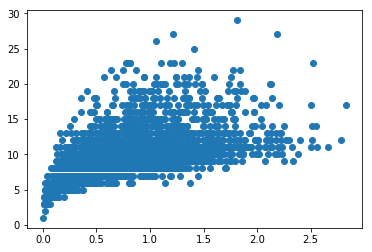

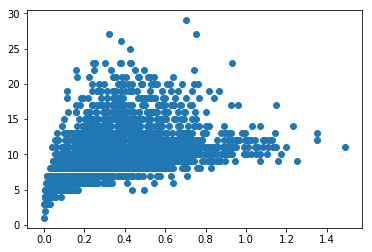

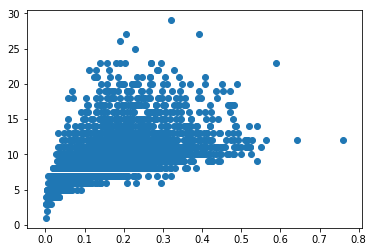

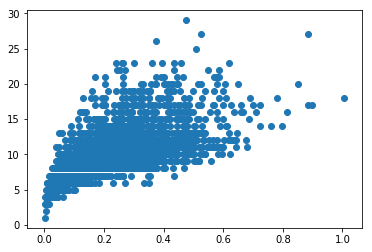

In [67]:
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:,i], y_train)
    plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_pred = lr.predict(x_test)

## Train test split

In [71]:
from sklearn.model_selection import train_test_split

Пример работы

In [16]:
xl = np.array(['a', 'b', 'c', 'd', 'e', 'f'])
yl = np.array([0,1,1,1,1,0])
x_tr, x_val, y_tr, y_val = train_test_split(xl, yl)

print('train:', x_tr, y_tr)
print('val:', x_val, y_val)

train: ['d' 'f' 'b' 'a'] [1 0 1 0]
val: ['e' 'c'] [1 1]


Теперь пользуясь функцией train_test_split разбейте выборку, затем создайте модель и сделайте предсказания

In [ ]:
*your code here*

In [ ]:
model = *your code here*
model.fit(*your code here*)

pred = *your code here*

Чтобы проверить модель, нужно реализовать метрику R-score

In [ ]:
def r_score(y_true, y_pred):
    *your code here*
    return 

Теперь проверим предсказания модели

In [ ]:
print(r_score(*your code here*))

Чтобы сверить с r_score из sklearn, импортируйте его сюда и сравните результаты

### Теперь делаем все тоже самое, только вместо train-test-split используем k-fold

Пример кросс валидации из sklearn

In [72]:
from sklearn.model_selection import KFold

создаем объект кросс валидации с 3 фолдами

In [74]:
kfold = KFold(3)

создаем массив для пробы

In [31]:
l = np.array(['a', 'b', 'c', 'd', 'e', 'f'])

теперь используем метод kfold.split(), чтобы получить индексы обучающей и проверочной части датасета. 

In [34]:
for train_index, validation_index in kfold.split(l):
    print('train_index: ', train_index)
    print('test_index: ', validation_index)
    
    train_data = l[train_index]
    test_data = l[validation_index]
    
    print('train_data:', train_data)
    print('test_data:', test_data)
    
    print("\n")

train_index:  [2 3 4 5]
test_index:  [0 1]
train_data: ['c' 'd' 'e' 'f']
test_data: ['a' 'b']


train_index:  [0 1 4 5]
test_index:  [2 3]
train_data: ['a' 'b' 'e' 'f']
test_data: ['c' 'd']


train_index:  [0 1 2 3]
test_index:  [4 5]
train_data: ['a' 'b' 'c' 'd']
test_data: ['e' 'f']




#### Теперь давайте проверим модель с помощью кросс валидации

Теперь посчитайте R-score

In [89]:
from sklearn.metrics import r2_score

### Много моделей на KFold

Напишите функцию, которая проверяет модель на данных

In [ ]:
def check_model(model, x, y):
    
    *your code here*
    
    print(r_score)

Теперь создадим зоопарк моделей 

In [ ]:
model_1 = *your code here*
model_2 = *your code here*
*your code here*

all_models = [model_1, model_2]

проверим для всех моделей

In [ ]:
for m in all_models:
    check_model(model, x_train, y_train)

### Улучшим данные

Добавьте в Х попраные произведения и квадраты

In [97]:
x_train.shape

(2998, 8)

In [126]:
def add_poly_2(X):
    
    #x_square = np.hstack([(X[:, i]).reshape(-1,1) for i in range(X.shape[1])])
    
    x_poly = *your code here*
    
    return np.hstack([X, x_poly])
    #return x_squares

Проверьте модели на обновленном датасете